In [1]:
import plons
import os
import numpy as np
import matplotlib.pyplot        as plt

import plons.ConversionFactors_cgs        as cgs
import plons.OrbitalEvolution             as ov

In [5]:
model = 'v10e50'
run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)
# dump   = 245

In [15]:
'''
Load in data
'''    
setup = plons.LoadSetup(run, "wind")
# dumpData = plons.LoadFullDump(os.path.join(run, f"wind_%05d" % dump), setup)
sinkData = plons.LoadSink(run, "wind",setup["icompanion_star"])

In [19]:


derivJ,j,timeArray = ov.calcJ(setup,sinkData)


In [27]:
def plot_3models(modelNames,saveName):
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    lineStyles = ['-.','--',':','-','-']
    colors = ['firebrick','goldenrod','navy']
    i = 0
    
    for model in modelNames:
        run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)
        setup = plons.LoadSetup(run, "wind")
        sinkData = plons.LoadSink(run, "wind",setup["icompanion_star"])
        derivJ,j,timeArray = ov.calcJ(setup,sinkData)
        Jcomp_z = sinkData['J_comp'].transpose()[2]
        ax1.plot(sinkData['time'],Jcomp_z,linestyle = lineStyles[i],c = colors[i],label=str(model))#,c = CB_color_cycle[2*i+1])
        ax2.plot(timeArray,derivJ,linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        ax3.plot(timeArray,j,linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        i = i+1
        
        
    ax1.legend(fontsize = 12)
    ax1.set_xlabel(r't [yrs] ',fontsize = 12)
    ax1.set_ylabel(r'J_z [g cm$^2$ / s]',fontsize = 12,rotation = 90)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)

    # ax2.legend(fontsize = 12)
    ax2.set_xlabel(r't [yrs] ',fontsize = 12)
    ax2.set_ylabel(r'dJ/dt [g cm$^2$ / s$^2$]',fontsize = 12,rotation = 90)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    # mini = 0
    # maxi = np.max(derivJ)
    # ov.plotVerticalApaPerLines(setup,sinkData,mini,maxi)

    # ax3.legend(fontsize = 12)
    ax3.set_xlabel(r't [yrs] ',fontsize = 12)
    ax3.set_ylabel(r'j [cm$^2$/s]',fontsize = 12,rotation = 90)
    ax3.tick_params(axis='x', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)
    # mini = 0
    # maxi = np.max(j)
    # ov.plotVerticalApaPerLines(setup,sinkData,mini,maxi)

    fig1.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_Jz_'+saveName+'.png')
    fig2.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_dJdt_'+saveName+'.png')
    fig3.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/evolution_j_'+saveName+'.png')


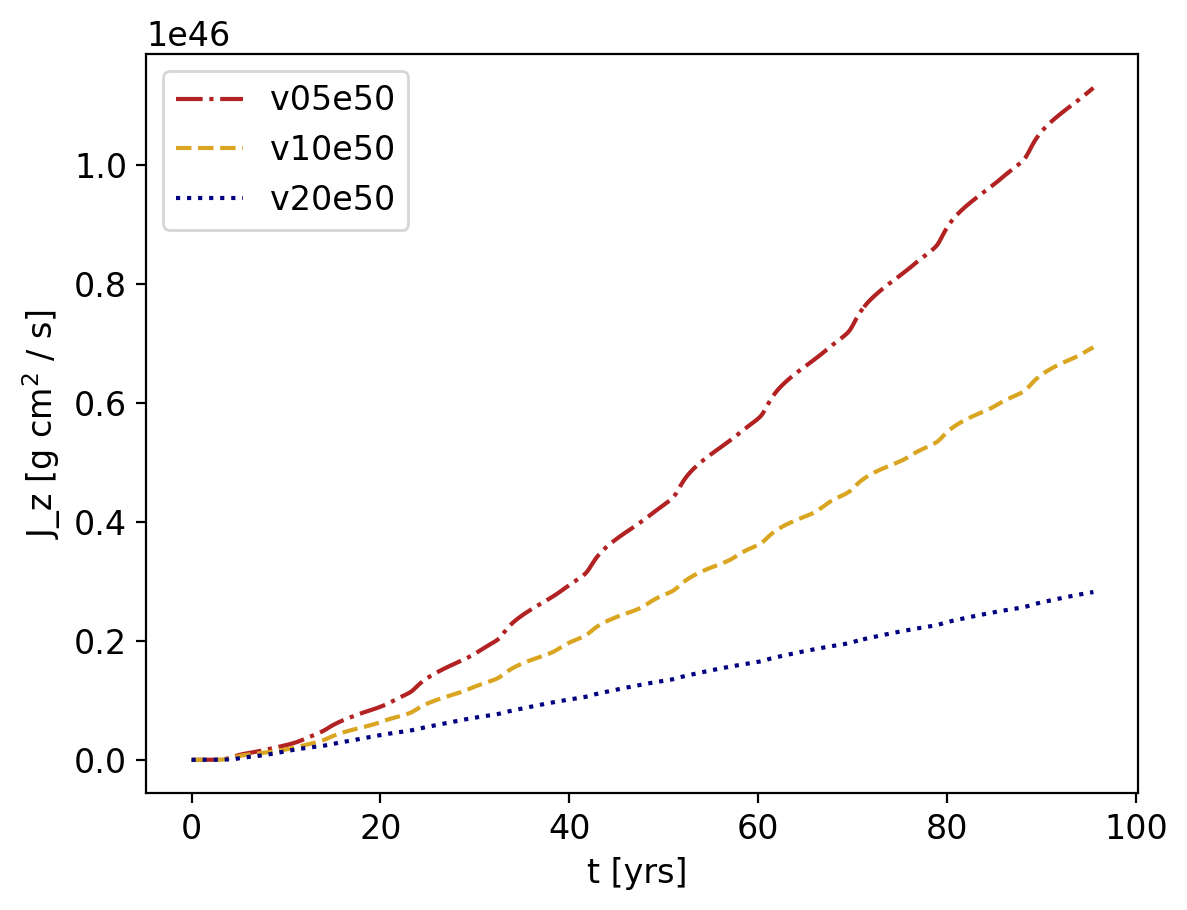

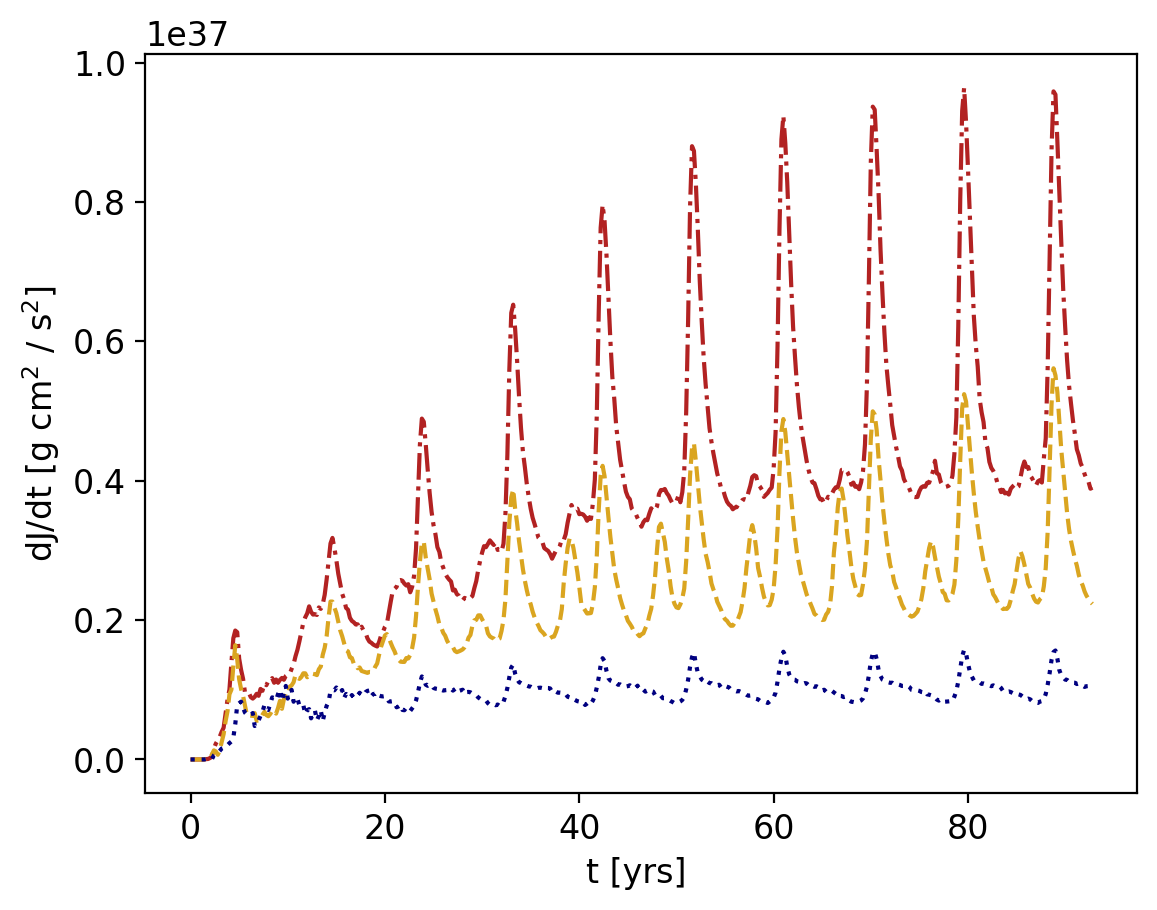

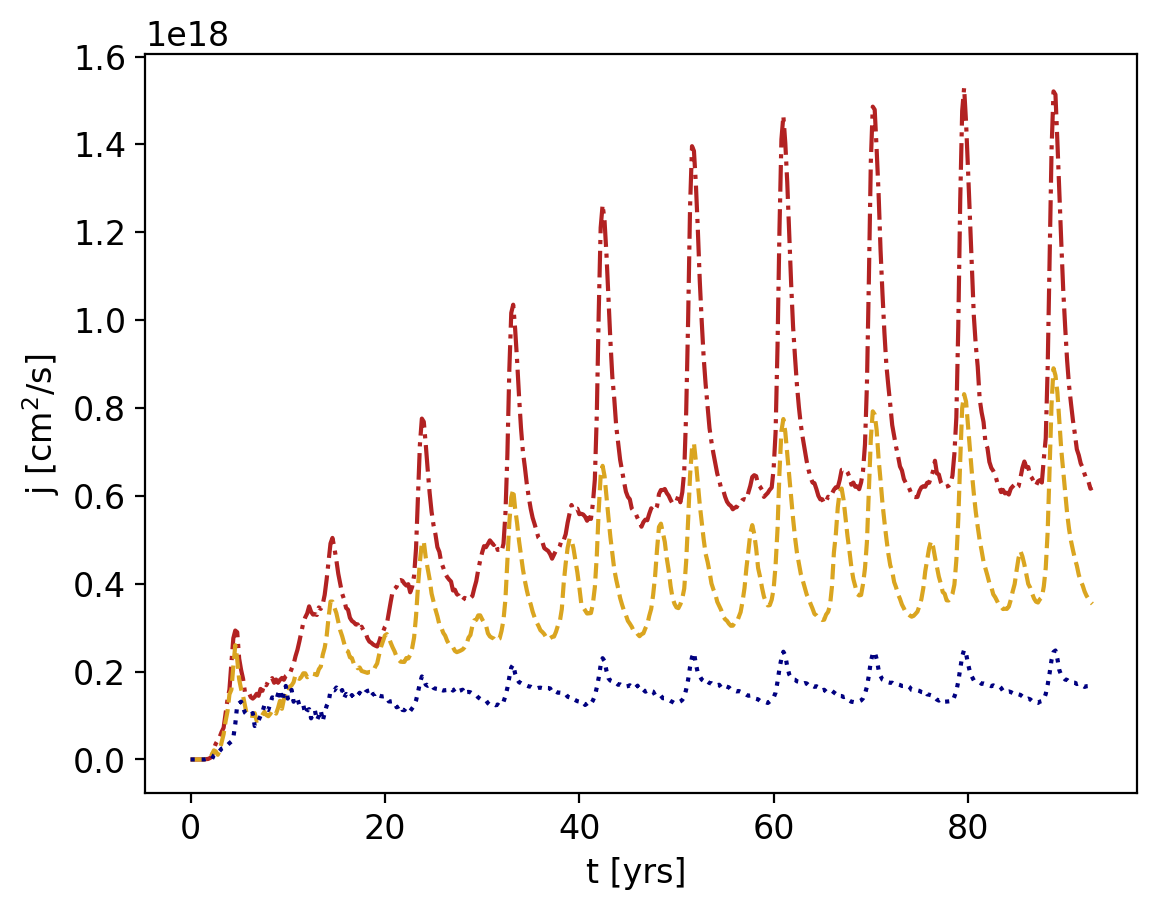

In [28]:
# modelNames = ['v05e00','v10e00','v20e00']
modelNames = ['v05e50','v10e50','v20e50']
plot_3models(modelNames,'e50')